In [2]:
import pickle
import matplotlib.pyplot as plt

### Retrieve scores for the two datasets

In [3]:
list_scenarii = {
        'dataset': ['cifar10', 'cinic10'],  # can be 'cifar10' or 'cinic10
        'mode': [0],
        'noise': ['normal', 'gumbel'],  # can be 'gumbel' or 'normal', used only in mode 2
        'sigma': [0.5],  # used in mode 1 and 2
        'epochs': [50],
        'batch_size': [32],
    }
# Mode 0 = Cross entropy loss
# Mode 1 = argmax with MSE Loss
# Mode 2 = argmax with Fenchel Young Loss

# Load all data from all possible combination of scenarios
data = {}
for dataset in list_scenarii['dataset']:
    for mode in list_scenarii['mode']:
        for noise in list_scenarii['noise']:
            for sigma in list_scenarii['sigma']:
                for epochs in list_scenarii['epochs']:
                    for batch_size in list_scenarii['batch_size']:
                        filename = f"./results/{dataset}/{noise}_{sigma}/mode{mode}/{epochs}_{batch_size}/"
                        try:
                            with open(filename + 'scores.pickle', 'rb') as file:
                                data[(dataset, mode, noise, sigma, epochs, batch_size, 'scores')] = pickle.load(file)
                        except:
                            print(f"File {filename + 'scores.pickle'} not found")
                        try:
                            with open(filename + 'loss.pickle', 'rb') as file:
                                data[(dataset, mode, noise, sigma, epochs, batch_size, 'loss')] = pickle.load(file)
                        except:
                            print(f"File {filename + 'loss.pickle'} not found")

In [4]:
list_scenarii = {
        'dataset': ['cifar10', 'cinic10'],  # can be 'cifar10' or 'cinic10
        'mode': [1, 2],
        'noise': ['normal', 'gumbel'],  # can be 'gumbel' or 'normal', used in mode 1 and 2
        'sigma': [0.001, 0.01, 0.1, 0.2, 0.5, 1.0, 10.0, 100.0],  # used in mode 1 and 2
        'epochs': [50],
        'batch_size': [32],
    }
# Mode 0 = Cross entropy loss
# Mode 1 = argmax with MSE Loss
# Mode 2 = argmax with Fenchel Young Loss

# Load all data from all possible combination of scenarios
for dataset in list_scenarii['dataset']:
    for mode in list_scenarii['mode']:
        for noise in list_scenarii['noise']:
            for sigma in list_scenarii['sigma']:
                for epochs in list_scenarii['epochs']:
                    for batch_size in list_scenarii['batch_size']:
                        filename = f"./results/{dataset}/{noise}_{sigma}/mode{mode}/{epochs}_{batch_size}/"
                        try:
                            with open(filename + 'scores.pickle', 'rb') as file:
                                data[(dataset, mode, noise, sigma, epochs, batch_size, 'scores')] = pickle.load(file)
                        except:
                            print(f"File {filename + 'scores.pickle'} not found")
                        try:
                            with open(filename + 'loss.pickle', 'rb') as file:
                                data[(dataset, mode, noise, sigma, epochs, batch_size, 'loss')] = pickle.load(file)
                        except:
                            print(f"File {filename + 'loss.pickle'} not found")

In [5]:
list(data.keys())

[('cifar10', 0, 'normal', 0.5, 50, 32, 'scores'),
 ('cifar10', 0, 'normal', 0.5, 50, 32, 'loss'),
 ('cifar10', 0, 'gumbel', 0.5, 50, 32, 'scores'),
 ('cifar10', 0, 'gumbel', 0.5, 50, 32, 'loss'),
 ('cinic10', 0, 'normal', 0.5, 50, 32, 'scores'),
 ('cinic10', 0, 'normal', 0.5, 50, 32, 'loss'),
 ('cinic10', 0, 'gumbel', 0.5, 50, 32, 'scores'),
 ('cinic10', 0, 'gumbel', 0.5, 50, 32, 'loss'),
 ('cifar10', 1, 'normal', 0.001, 50, 32, 'scores'),
 ('cifar10', 1, 'normal', 0.001, 50, 32, 'loss'),
 ('cifar10', 1, 'normal', 0.01, 50, 32, 'scores'),
 ('cifar10', 1, 'normal', 0.01, 50, 32, 'loss'),
 ('cifar10', 1, 'normal', 0.1, 50, 32, 'scores'),
 ('cifar10', 1, 'normal', 0.1, 50, 32, 'loss'),
 ('cifar10', 1, 'normal', 0.2, 50, 32, 'scores'),
 ('cifar10', 1, 'normal', 0.2, 50, 32, 'loss'),
 ('cifar10', 1, 'normal', 0.5, 50, 32, 'scores'),
 ('cifar10', 1, 'normal', 0.5, 50, 32, 'loss'),
 ('cifar10', 1, 'normal', 1.0, 50, 32, 'scores'),
 ('cifar10', 1, 'normal', 1.0, 50, 32, 'loss'),
 ('cifar10', 1

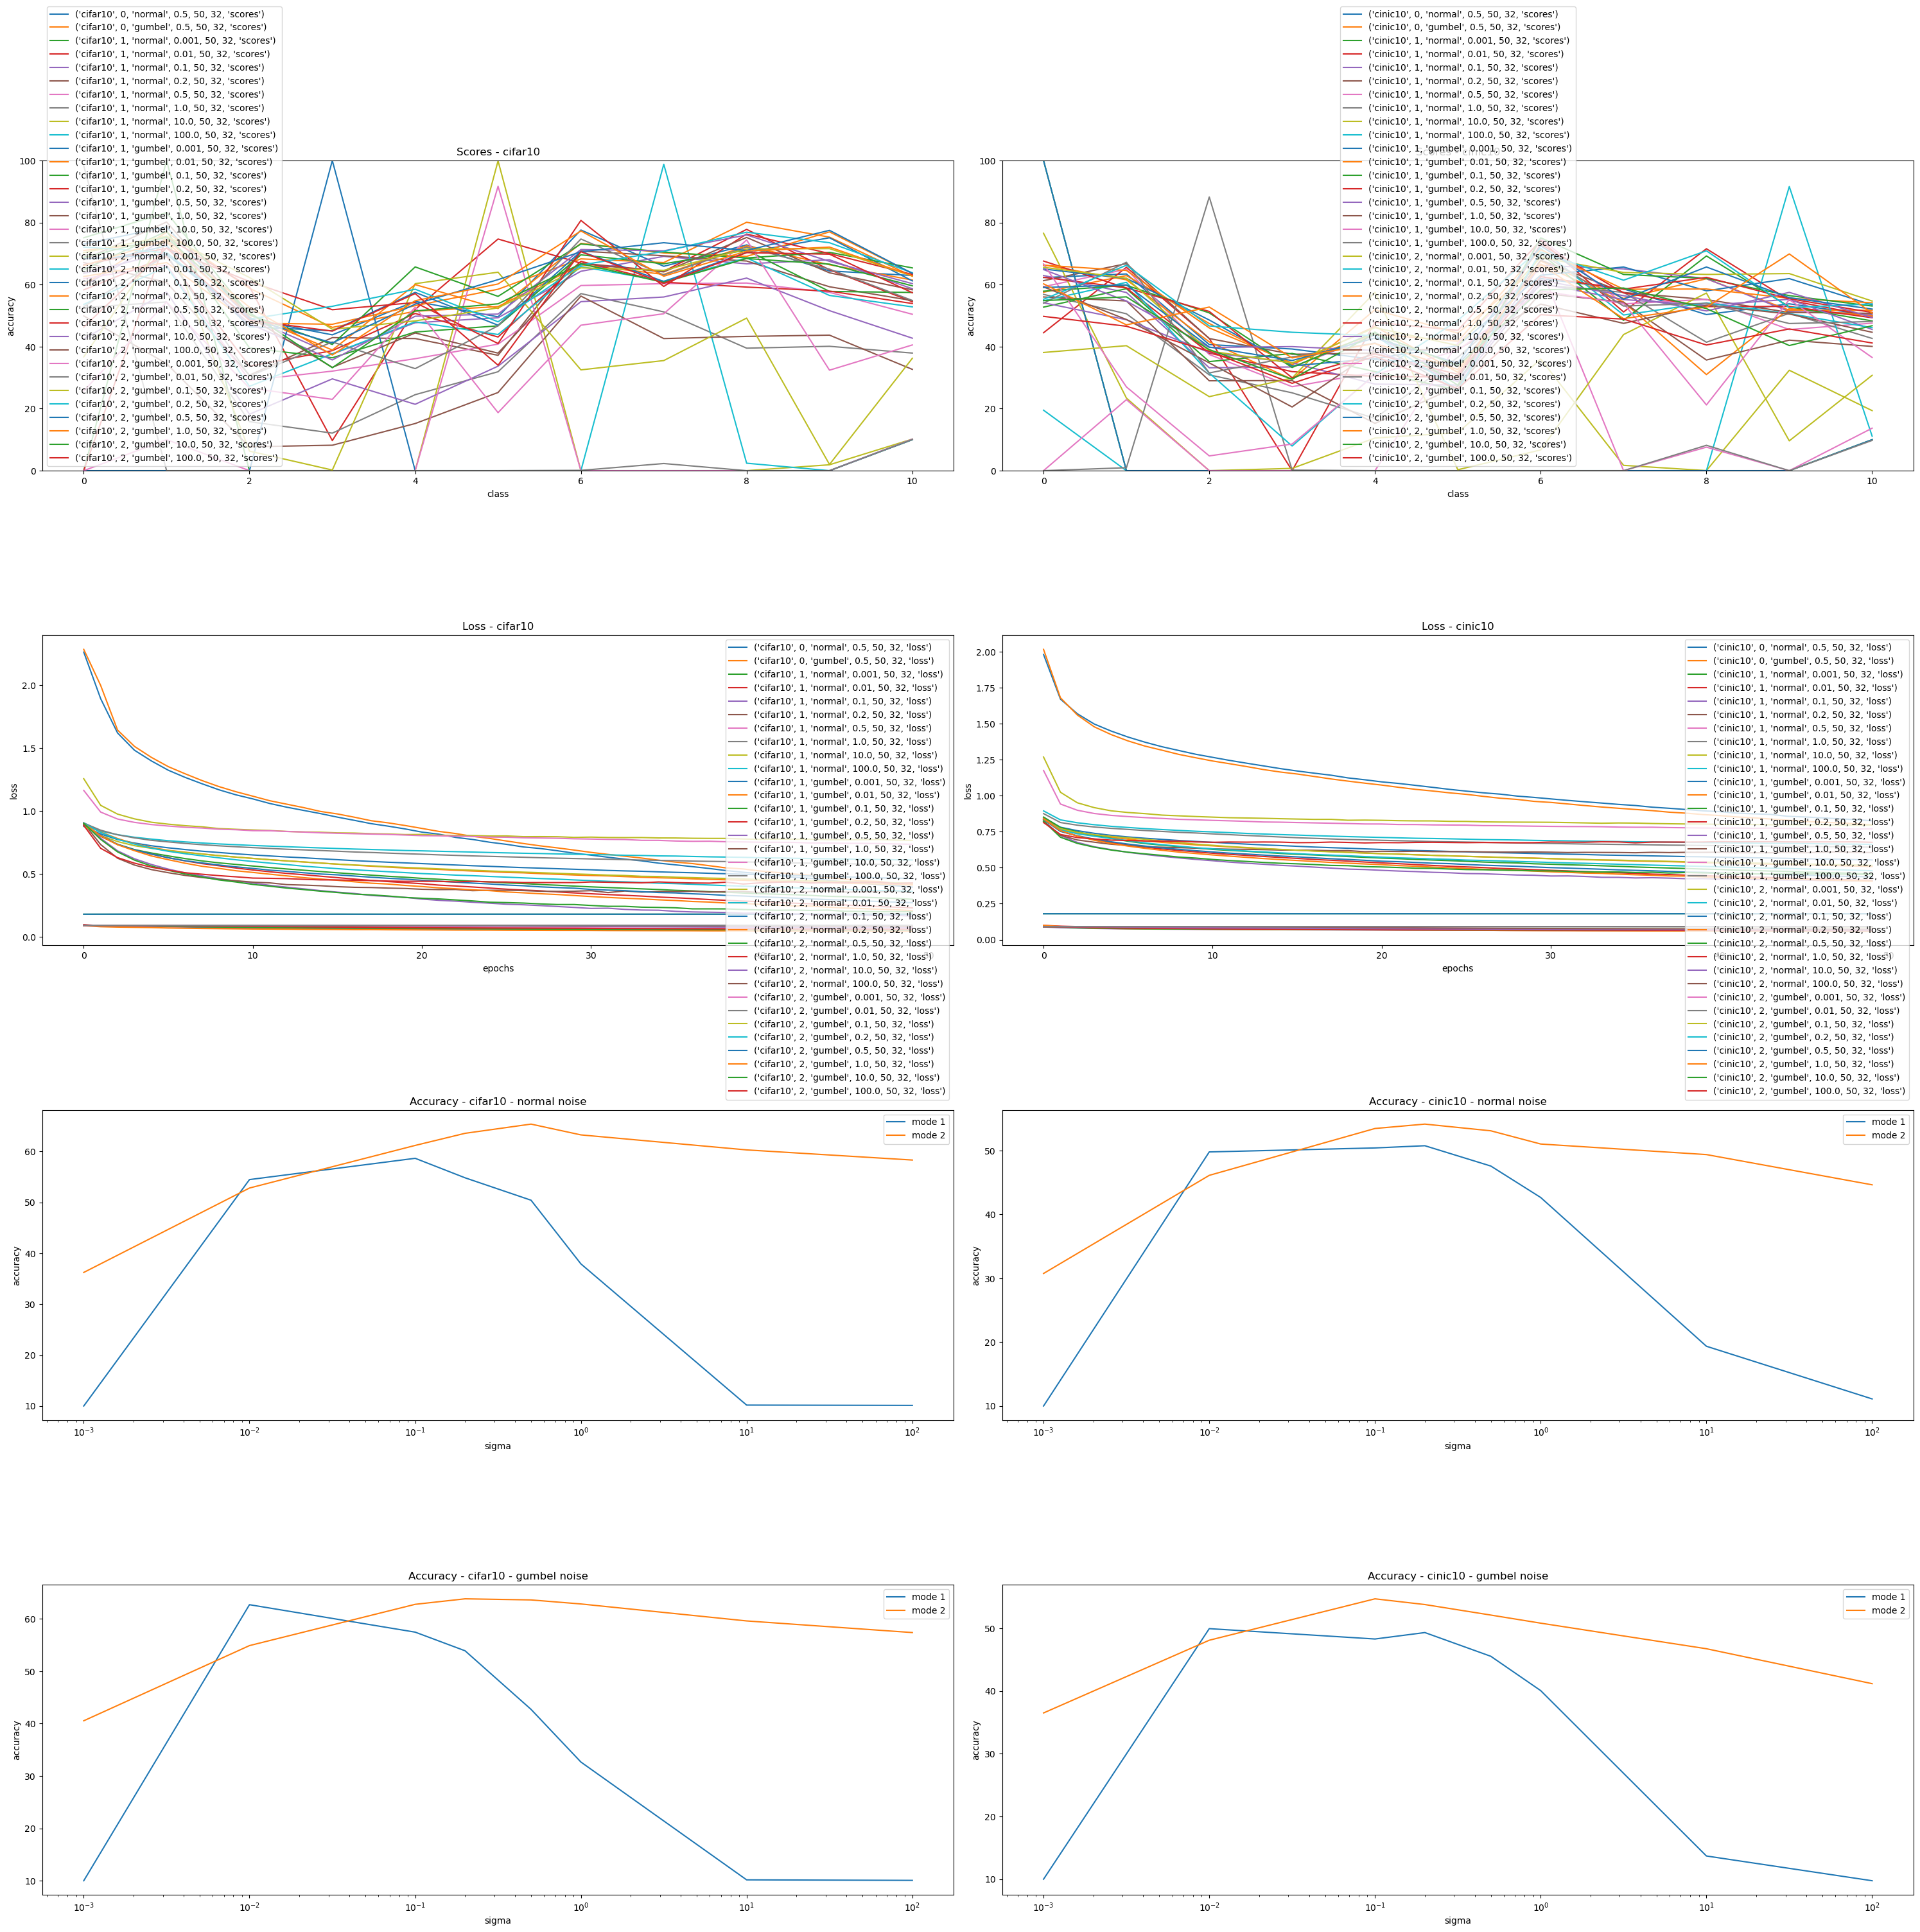

In [6]:
fig, ax = plt.subplots(4, 2, figsize=(30, 30))
for key in data.keys():
    if key[6] == 'scores' and key[0] == 'cifar10':
        ax[0, 0].plot(data[key], label=str(key))
        ax[0, 0].set_ylim(0, 100)
        ax[0, 0].legend()
        ax[0, 0].set_xlabel('class')
        ax[0, 0].set_ylabel('accuracy')
        ax[0, 0].set_title('Scores - cifar10')

for key in data.keys():
    if key[6] == 'scores' and key[0] == 'cinic10':
        ax[0, 1].plot(data[key], label=str(key))
        ax[0, 1].set_ylim(0, 100)
        ax[0, 1].legend()
        ax[0, 1].set_xlabel('class')
        ax[0, 1].set_ylabel('accuracy')
        ax[0, 1].set_title('Scores - cinic10')

for key in data.keys():
    if key[6] == 'loss' and key[0] == 'cifar10':
        ax[1, 0].plot(data[key], label=str(key))
        ax[1, 0].legend()
        ax[1, 0].set_xlabel('epochs')
        ax[1, 0].set_ylabel('loss')
        ax[1, 0].set_title('Loss - cifar10')

for key in data.keys():
    if key[6] == 'loss' and key[0] == 'cinic10':
        ax[1, 1].plot(data[key], label=str(key))
        ax[1, 1].legend()
        ax[1, 1].set_xlabel('epochs')
        ax[1, 1].set_ylabel('loss')
        ax[1, 1].set_title('Loss - cinic10')

# plot accuracy (score[-1]) depending on sigma
accuracy_dict_cifar_1_normal, accuracy_dict_cifar_2_normal = {}, {}
accuracy_dict_cifar_1_gumbel, accuracy_dict_cifar_2_gumbel = {}, {}
accuracy_dict_cinic_1_normal, accuracy_dict_cinic_2_normal = {}, {}
accuracy_dict_cinic_1_gumbel, accuracy_dict_cinic_2_gumbel = {}, {}
for key in data.keys():
    if key[0] == 'cifar10' and key[1] == 1 and key[2] == 'normal' and key[6] == 'scores':
        accuracy_dict_cifar_1_normal[key[3]] = data[key][-1]
    if key[0] == 'cifar10' and key[1] == 2 and key[2] == 'normal' and key[6] == 'scores':
        accuracy_dict_cifar_2_normal[key[3]] = data[key][-1]
    if key[0] == 'cifar10' and key[1] == 1 and key[2] == 'gumbel' and key[6] == 'scores':
        accuracy_dict_cifar_1_gumbel[key[3]] = data[key][-1]
    if key[0] == 'cifar10' and key[1] == 2 and key[2] == 'gumbel' and key[6] == 'scores':
        accuracy_dict_cifar_2_gumbel[key[3]] = data[key][-1]
    if key[0] == 'cinic10' and key[1] == 1 and key[2] == 'normal' and key[6] == 'scores':
        accuracy_dict_cinic_1_normal[key[3]] = data[key][-1]
    if key[0] == 'cinic10' and key[1] == 2 and key[2] == 'normal' and key[6] == 'scores':
        accuracy_dict_cinic_2_normal[key[3]] = data[key][-1]
    if key[0] == 'cinic10' and key[1] == 1 and key[2] == 'gumbel' and key[6] == 'scores':
        accuracy_dict_cinic_1_gumbel[key[3]] = data[key][-1]
    if key[0] == 'cinic10' and key[1] == 2 and key[2] == 'gumbel' and key[6] == 'scores':
        accuracy_dict_cinic_2_gumbel[key[3]] = data[key][-1]

# sort the dictionaries according to the keys
accuracy_dict_cifar_1_normal = dict(sorted(accuracy_dict_cifar_1_normal.items()))
accuracy_dict_cifar_2_normal = dict(sorted(accuracy_dict_cifar_2_normal.items()))
accuracy_dict_cifar_1_gumbel = dict(sorted(accuracy_dict_cifar_1_gumbel.items()))
accuracy_dict_cifar_2_gumbel = dict(sorted(accuracy_dict_cifar_2_gumbel.items()))
accuracy_dict_cinic_1_normal = dict(sorted(accuracy_dict_cinic_1_normal.items()))
accuracy_dict_cinic_2_normal = dict(sorted(accuracy_dict_cinic_2_normal.items()))
accuracy_dict_cinic_1_gumbel = dict(sorted(accuracy_dict_cinic_1_gumbel.items()))
accuracy_dict_cinic_2_gumbel = dict(sorted(accuracy_dict_cinic_2_gumbel.items()))


ax[2, 0].plot(list(accuracy_dict_cifar_1_normal.keys()), list(accuracy_dict_cifar_1_normal.values()), label='mode 1')
ax[2, 0].plot(list(accuracy_dict_cifar_2_normal.keys()), list(accuracy_dict_cifar_2_normal.values()), label='mode 2')
ax[2, 0].legend()
ax[2, 0].set_xlabel('sigma')
ax[2, 0].set_xscale('log')
ax[2, 0].set_ylabel('accuracy')
ax[2, 0].set_title('Accuracy - cifar10 - normal noise')

ax[2, 1].plot(list(accuracy_dict_cinic_1_normal.keys()), list(accuracy_dict_cinic_1_normal.values()), label='mode 1')
ax[2, 1].plot(list(accuracy_dict_cinic_2_normal.keys()), list(accuracy_dict_cinic_2_normal.values()), label='mode 2')
ax[2, 1].legend()
ax[2, 1].set_xlabel('sigma')
ax[2, 1].set_xscale('log')
ax[2, 1].set_ylabel('accuracy')
ax[2, 1].set_title('Accuracy - cinic10 - normal noise')

ax[3, 0].plot(list(accuracy_dict_cifar_1_gumbel.keys()), list(accuracy_dict_cifar_1_gumbel.values()), label='mode 1')
ax[3, 0].plot(list(accuracy_dict_cifar_2_gumbel.keys()), list(accuracy_dict_cifar_2_gumbel.values()), label='mode 2')
ax[3, 0].legend()
ax[3, 0].set_xlabel('sigma')
ax[3, 0].set_xscale('log')
ax[3, 0].set_ylabel('accuracy')
ax[3, 0].set_title('Accuracy - cifar10 - gumbel noise')

ax[3, 1].plot(list(accuracy_dict_cinic_1_gumbel.keys()), list(accuracy_dict_cinic_1_gumbel.values()), label='mode 1')
ax[3, 1].plot(list(accuracy_dict_cinic_2_gumbel.keys()), list(accuracy_dict_cinic_2_gumbel.values()), label='mode 2')
ax[3, 1].legend()
ax[3, 1].set_xlabel('sigma')
ax[3, 1].set_xscale('log')
ax[3, 1].set_ylabel('accuracy')
ax[3, 1].set_title('Accuracy - cinic10 - gumbel noise')
        
plt.tight_layout()
plt.show()

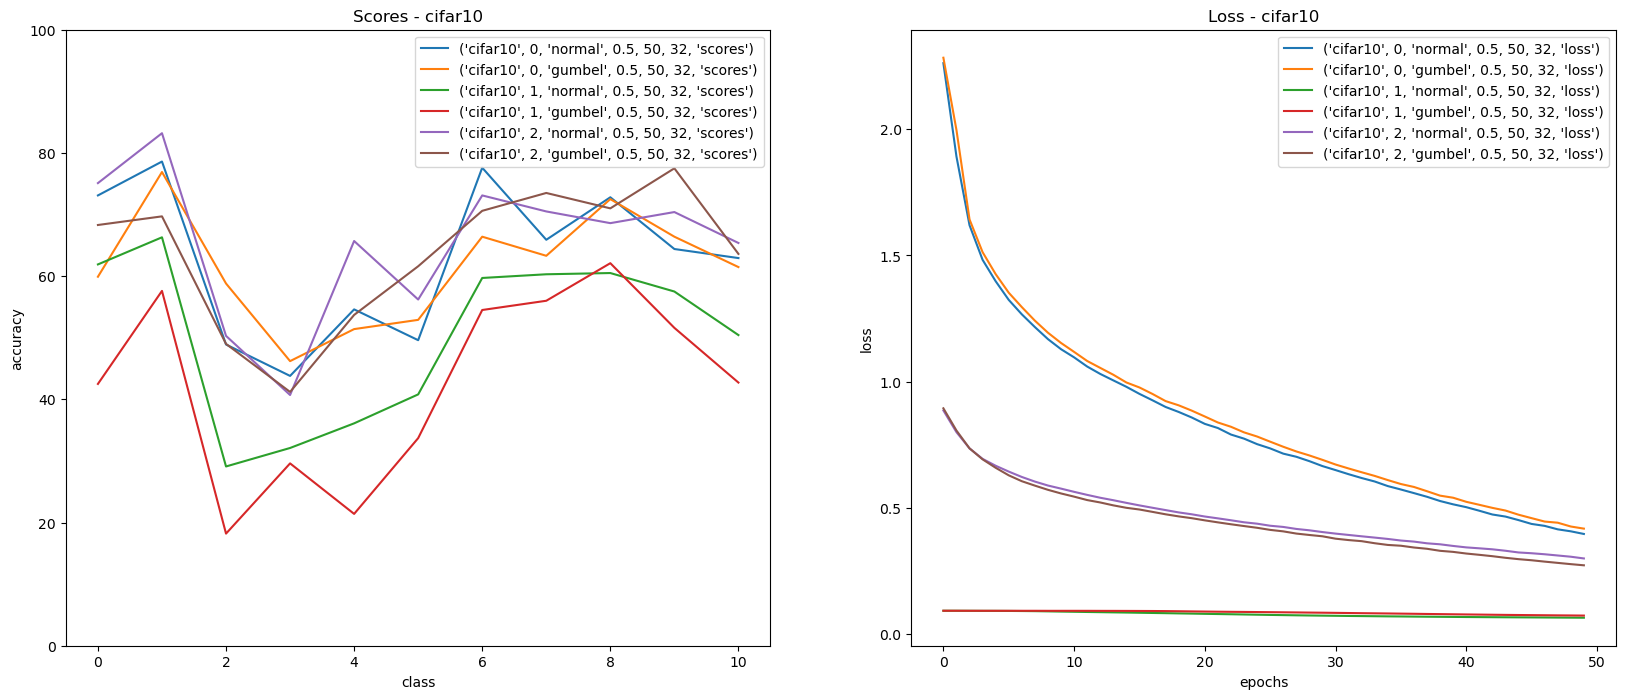

In [35]:
fig = plt.figure(figsize=(20, 8))
ax = plt.subplot(1, 2, 1)
for key in data.keys():
    if key[6] == 'scores' and key[0] == 'cifar10' and key[3] == 0.5:
        ax.plot(data[key], label=str(key))
        ax.set_ylim(0, 100)
        ax.legend()
        ax.set_xlabel('class')
        ax.set_ylabel('accuracy')
        ax.set_title('Scores - cifar10')
ax = plt.subplot(1, 2, 2)
for key in data.keys():
    if key[6] == 'loss' and key[0] == 'cifar10' and key[3] == 0.5:
        ax.plot(data[key], label=str(key))
        ax.legend()
        ax.set_xlabel('epochs')
        ax.set_ylabel('loss')
        ax.set_title('Loss - cifar10')
plt.savefig('./figures/cifar10.png')
plt.show()

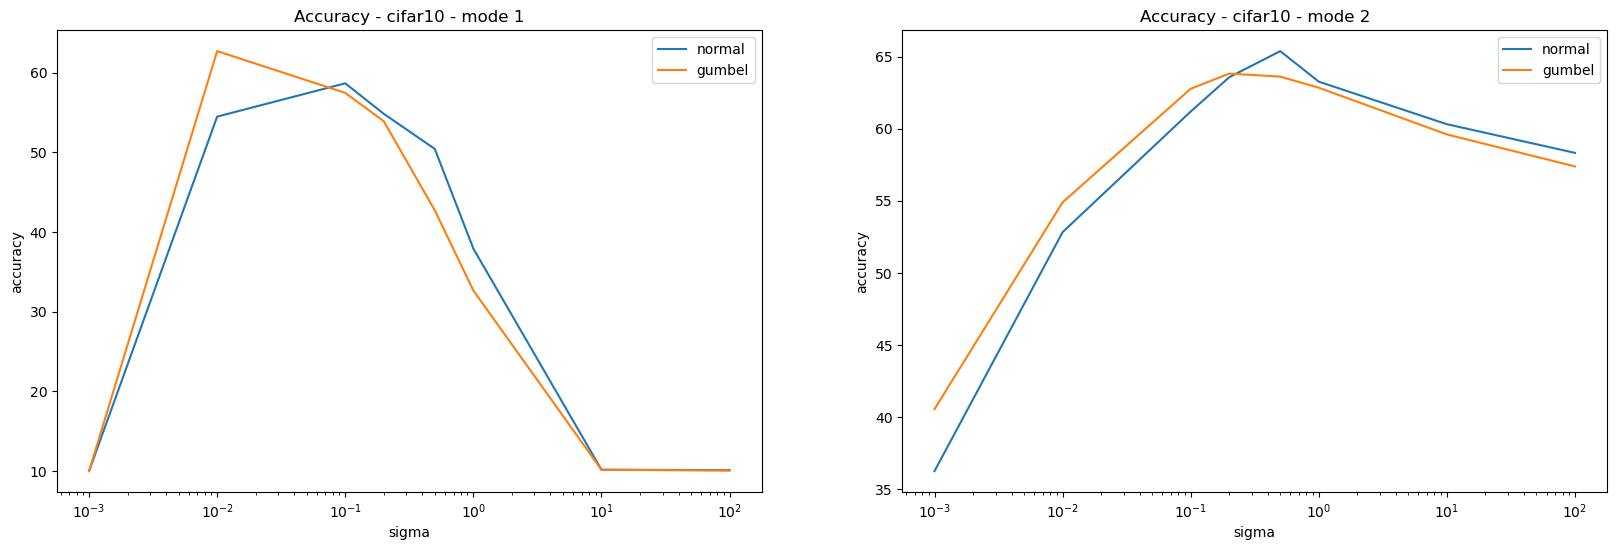

In [32]:
fig = plt.figure(figsize=(20, 6))
ax = plt.subplot(1, 2, 1)
ax.plot(list(accuracy_dict_cifar_1_normal.keys()), list(accuracy_dict_cifar_1_normal.values()), label='normal')
ax.plot(list(accuracy_dict_cifar_1_gumbel.keys()), list(accuracy_dict_cifar_1_gumbel.values()), label='gumbel')
ax.legend()
ax.set_xlabel('sigma')
ax.set_xscale('log')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy - cifar10 - mode 1')

ax = plt.subplot(1, 2, 2)
ax.plot(list(accuracy_dict_cifar_2_normal.keys()), list(accuracy_dict_cifar_2_normal.values()), label='normal')
ax.plot(list(accuracy_dict_cifar_2_gumbel.keys()), list(accuracy_dict_cifar_2_gumbel.values()), label='gumbel')
ax.legend()
ax.set_xlabel('sigma')
ax.set_xscale('log')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy - cifar10 - mode 2')
plt.savefig('./figures/variation_eps_cifar10.png')
plt.show()

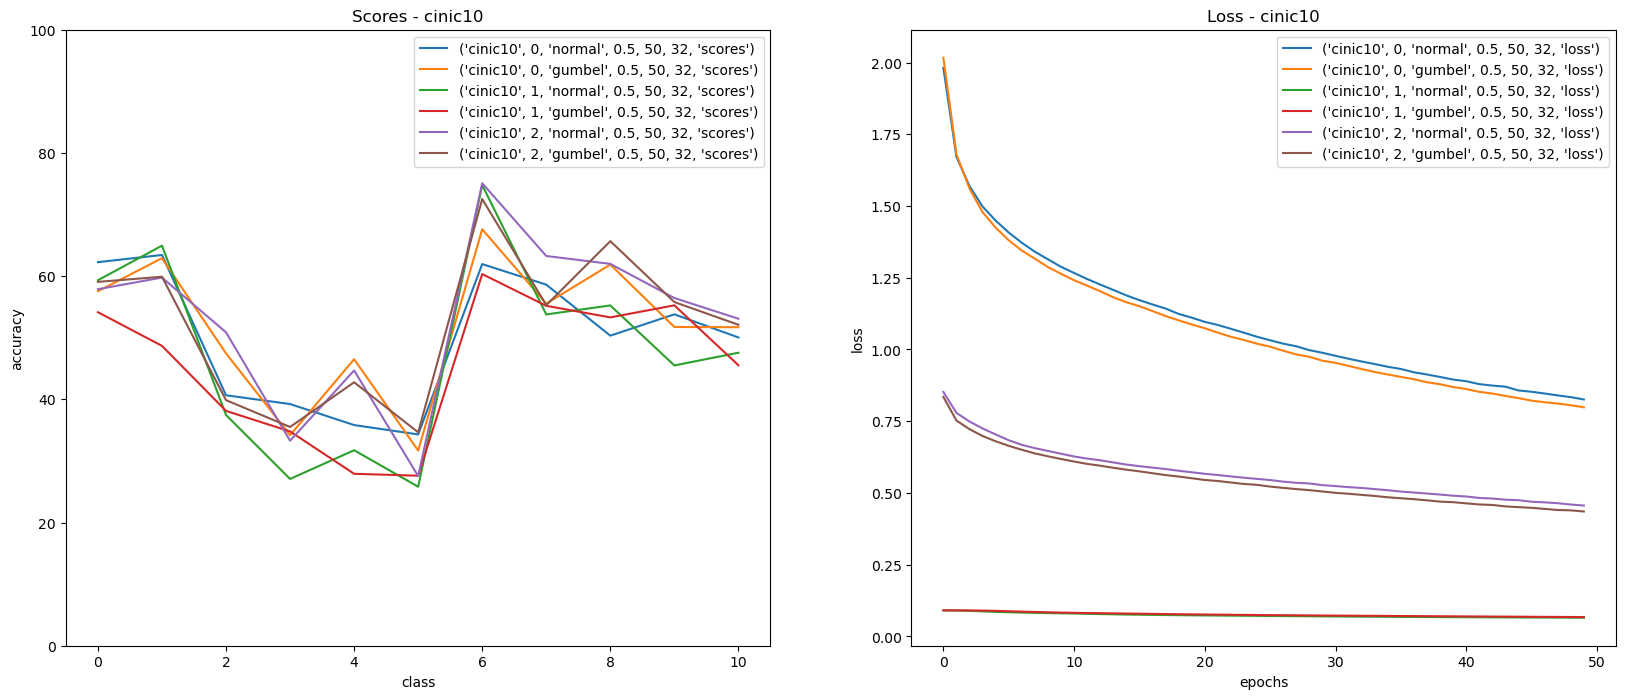

In [39]:
fig = plt.figure(figsize=(20, 8))
ax = plt.subplot(1, 2, 1)
for key in data.keys():
    if key[6] == 'scores' and key[0] == 'cinic10' and key[3] == 0.5:
        ax.plot(data[key], label=str(key))
        ax.set_ylim(0, 100)
        ax.legend()
        ax.set_xlabel('class')
        ax.set_ylabel('accuracy')
        ax.set_title('Scores - cinic10')
ax = plt.subplot(1, 2, 2)
for key in data.keys():
    if key[6] == 'loss' and key[0] == 'cinic10' and key[3] == 0.5:
        ax.plot(data[key], label=str(key))
        ax.legend()
        ax.set_xlabel('epochs')
        ax.set_ylabel('loss')
        ax.set_title('Loss - cinic10')
plt.savefig('./figures/cinic10.png')
plt.show()

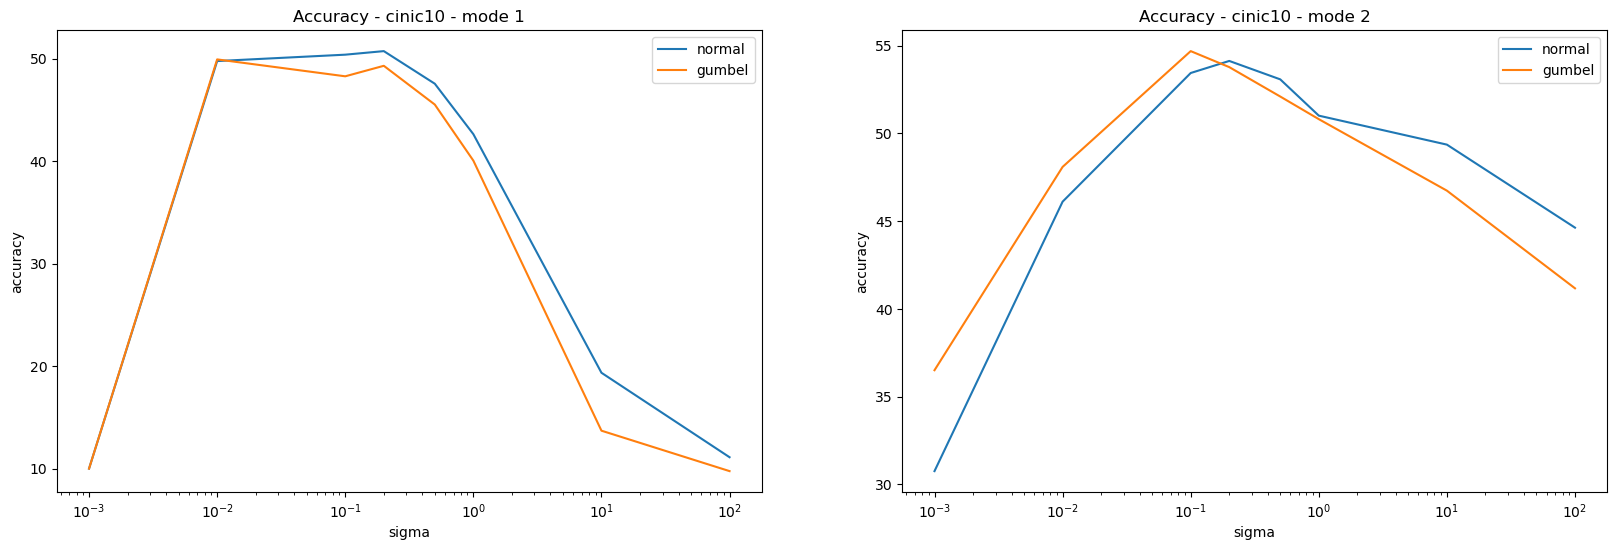

In [40]:
fig = plt.figure(figsize=(20, 6))
ax = plt.subplot(1, 2, 1)
ax.plot(list(accuracy_dict_cinic_1_normal.keys()), list(accuracy_dict_cinic_1_normal.values()), label='normal')
ax.plot(list(accuracy_dict_cinic_1_gumbel.keys()), list(accuracy_dict_cinic_1_gumbel.values()), label='gumbel')
ax.legend()
ax.set_xlabel('sigma')
ax.set_xscale('log')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy - cinic10 - mode 1')

ax = plt.subplot(1, 2, 2)
ax.plot(list(accuracy_dict_cinic_2_normal.keys()), list(accuracy_dict_cinic_2_normal.values()), label='normal')
ax.plot(list(accuracy_dict_cinic_2_gumbel.keys()), list(accuracy_dict_cinic_2_gumbel.values()), label='gumbel')
ax.legend()
ax.set_xlabel('sigma')
ax.set_xscale('log')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy - cinic10 - mode 2')
plt.savefig('./figures/variation_eps_cinic10.png')
plt.show()

No handles with labels found to put in legend.


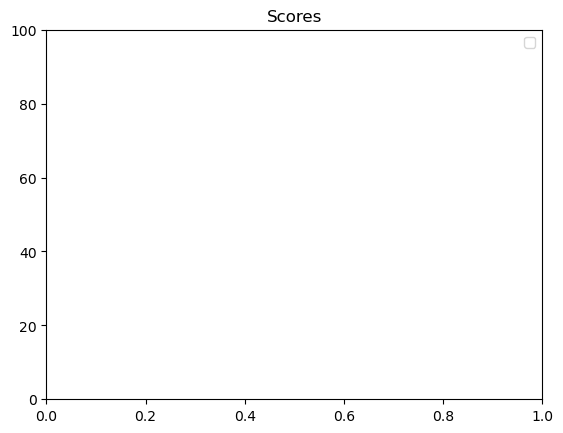

No handles with labels found to put in legend.


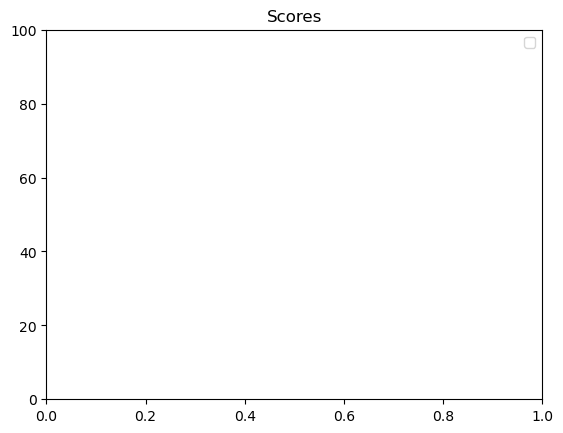

No handles with labels found to put in legend.


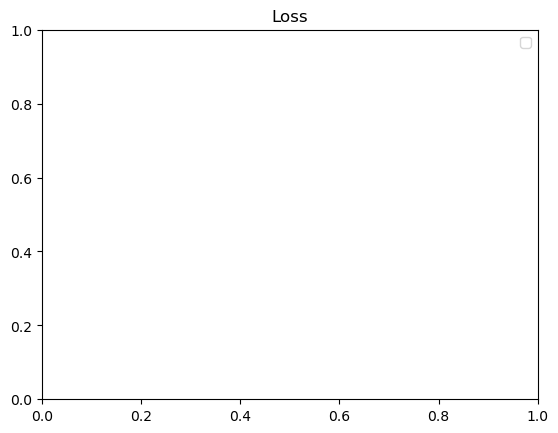

No handles with labels found to put in legend.


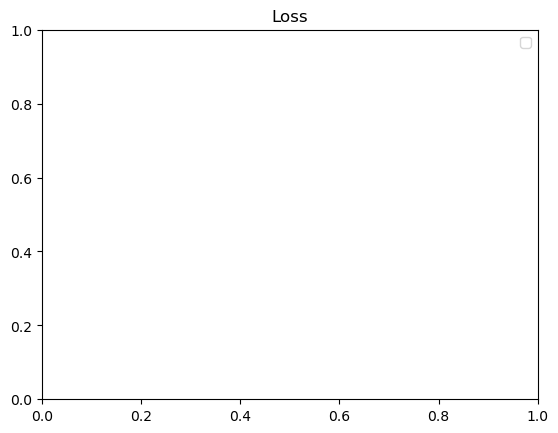

In [37]:
# open all the files and plot the results
for key in data.keys():
    if key[5] == 'scores' and key[0] == 'cifar10':
        plt.plot(data[key], label=str(key))
plt.ylim(0, 100)
plt.legend()
plt.title('Scores')
plt.show()

# open all the files and plot the results
for key in data.keys():
    if key[5] == 'scores' and key[0] == 'cinic10':
        plt.plot(data[key], label=str(key))
plt.ylim(0, 100)
plt.legend()
plt.title('Scores')
plt.show()

for key in data.keys():
    if key[5] == 'loss' and key[0] == 'cifar10':
        plt.plot(data[key], label=str(key))
plt.legend()
plt.title('Loss')
plt.show()

for key in data.keys():
    if key[5] == 'loss' and key[0] == 'cinic10':
        plt.plot(data[key], label=str(key))
plt.legend()
plt.title('Loss')
plt.show()

In [38]:
# cifar10
with open('./results/score_cifar.pickle', 'rb') as f:
    score_cifar = pickle.load(f)
with open('./results/score_cifar_not_perturbed.pickle', 'rb') as f:
    score_cifar_not_perturbed = pickle.load(f)
with open('./results/score_cifar_not_perturbed_2.pickle', 'rb') as f:
    score_cifar_not_perturbed_2 = pickle.load(f)

# cinic
with open('./results/score_cinic.pickle', 'rb') as f:
    score_cinic = pickle.load(f)
with open('./results/score_cinic_not_perturbed.pickle', 'rb') as f:
    score_cinic_not_perturbed = pickle.load(f)
with open('./results/score_cinic_not_perturbed_2.pickle', 'rb') as f:
    score_cinic_not_perturbed_2 = pickle.load(f)

FileNotFoundError: [Errno 2] No such file or directory: './results/score_cifar.pickle'

# Plots

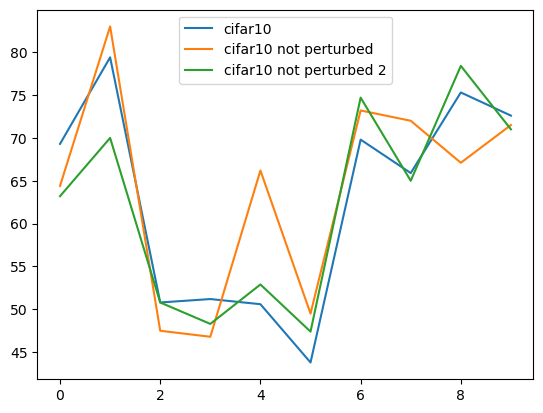

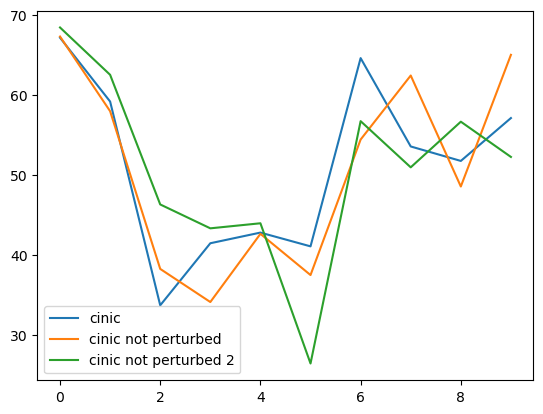

In [ ]:
plt.plot(score_cifar, label='cifar10')
plt.plot(score_cifar_not_perturbed, label='cifar10 not perturbed')
plt.plot(score_cifar_not_perturbed_2, label='cifar10 not perturbed 2')
plt.legend()
plt.show()
plt.plot(score_cinic, label='cinic')
plt.plot(score_cinic_not_perturbed, label='cinic not perturbed')
plt.plot(score_cinic_not_perturbed_2, label='cinic not perturbed 2')
plt.legend()
plt.show()